# Построение модели, предсказывающей отток абонентов

### Описание проекта. Телеком ###
Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Ваша задача — обучить на этих данных модель для прогноза оттока клиентов.

***Описание услуг***

Оператор предоставляет два основных типа услуг:
- Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
- Интернет. Подключение бывает двух типов: через телефонную линию DSL (англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (англ. fiber optic).

Также абонентам доступен ряд услуг:

- Интернет-безопасность: антивирус (Device Protection) и блокировка опасных сайтов (Online Security);
- Выделенная линия технической поддержки (Tech Support);
- Облачное хранилище файлов для резервного копирования данных (Online Backup);
- Стриминговое телевидение (Streaming TV) и каталог фильмов (Streaming Movies).

За услуги клиенты могут платить ежемесячно или раз в 1–2 года. Доступны различные способы расчёта и возможность получить электронный чек.

Описание данных
Данные хранятся в базе данных PostgreSQL. Она состоит из нескольких таблиц:
 - contract — информация о договорах;
 - personal — персональные данные клиентов;
 - internet — информация об интернет-услугах;
 - phone — информация об услугах телефонии.

***Таблица telecom.contract***
- customerID — ID абонента;
- BeginDate — дата начала действия договора;
- EndDate — дата окончания действия договора;
- Type — тип оплаты: раз в год-два или ежемесячно;
- PaperlessBilling — электронный расчётный лист;
- PaymentMethod — тип платежа;
- MonthlyCharges — расходы за месяц;
- TotalCharges — общие расходы абонента.

***Таблица personal***
 - customerID — ID пользователя;
 - gender — пол;
 - SeniorCitizen — является ли абонент пенсионером;
 - Partner — есть ли у абонента супруг или супруга;
 - Dependents — есть ли у абонента дети.

***Таблица telecom.internet***
 - customerID — ID пользователя;
 - InternetService — тип подключения;
 - OnlineSecurity — блокировка опасных сайтов;
 - OnlineBackup — облачное хранилище файлов для резервного копирования данных;
 - DeviceProtection — антивирус;
 - TechSupport — выделенная линия технической поддержки;
 - StreamingTV — стриминговое телевидение;
 - StreamingMovies — каталог фильмов.

***Таблица telecom.phone***
 - customerID — ID пользователя;
 - MultipleLines — подключение телефона к нескольким линиям одновременно.
 
 
Информация о договорах актуальна на 1 февраля 2020

## Основные этапы работы над проектом:

__1. Загрузка данных__
Подключитесь к базе данных SQL. 

__2. Исследовательский анализ и предобработка данных__
 - Проверка все ли таблицы содержат данные.
 - Соответствует ли количество таблиц условию задачи.
 - Для каждой таблицы:проверка наличия пропусков и аномалий, изуние распределение признаков.
 - Обработка аномалии с учётом особенностей услуг телекоммуникации.
 - Объединение таблицы по ID клиента
 - Генерировать новые признаки, которые могут пригодиться при обучении. Например, длительность контракта абонента.
 - Выделение в целевую переменную признак EndDate.
 - Проведите исследовательского анализа данных объединённой таблицы, при необходимости заполнение пропусков и визуализация распределения каждого признака.
 - Визуализация соотношения ушедших и оставшихся клиентов для каждого признака.
 - Проведение корреляционного анализа.
 - Подготовка данных для обучения:
 - Разделение данных на тренировочную и тестовую выборки (test_size = 0.25).
 - Подготовьте выборки для обучения, учитывайте особенности выбранных моделей.

__3. Обучение моделей__
- случайный лес,
- бустинги : xgboost и catboost,
- нейронная сеть.
 
- Поиск лучшей модели для прогноза оттока клиентов с помощью метрики ROC-AUC на кросс-валидации.

__4. Протестируйте модель и продемонстрируйте её работу__
 - Проверка качества лучшей модели на тестовой выборке. Значение метрики ROC-AUC должно быть не менее 0.85. Для интерпретируемости модели дополнительно выведите значение accuracy.
 - Построение матрицы ошибок лучшей модели. Отображение полноту и точность модели на графике.
 - Анализ важность основных входных признаков, влияющих на отток клиентов.
 - Для одного из важных входных признаков проведение дополнительное исследование: на графике показать зависимости входного и целевого признаков.
 
__5. Общие выводы по работе__
 - Общие выводы, предложение способов для дальнейшего улучшения модели и написание бизнес-рекомендаций заказчику.

***тут будут все import и установки по проекту***

In [1]:
!pip install -q -U skorch


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip3 install catboost -q


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install torch -q


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install shap -q


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install phik -q


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
#тут будут все испорты

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import catboost
import warnings
import xgboost
import shap
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import phik


from plotly import graph_objects as go
from sqlalchemy import create_engine 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, precision_score, fbeta_score, make_scorer, precision_recall_curve

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [7]:
#константы проекта

RANDOM_STATE = 11122023

# 1. Загрузка данных

### Конфигурация для подключения к базе данных `data-science-final`
Эта база данных содержит схему `stackoverflow`, с которой вы будете работать в проекте

In [8]:
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-science-final' # название базы данных
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения

In [9]:
engine = create_engine(connection_string) 

# 2. Проведение исследовательского анализа и предобработки данных



Объедините таблицы по ID клиента:
  
Каждому клиенту должно соответствовать одно наблюдение. При объединении учитывайте особенности услуг телекоммуникации.
Попробуйте сгенерировать новые признаки, которые могут пригодиться при обучении. Например, рассчитайте длительность контракта абонента.
Выделите в целевую переменную признак EndDate.
Проведите исследовательский анализ данных объединённой таблицы, при необходимости заполните пропуски и визуализируйте распределение каждого признака.
Визуализируйте соотношение ушедших и оставшихся клиентов для каждого признака.
Проведите корреляционный анализ.
Подготовьте данные для обучения:
  
Выберите признаки, которые будете использовать для обучения, учитывайте особенности данных и выбранных моделей. Перед вами не стоит задача временных рядов, поэтому не стоит использовать даты как входные признаки модели.
Если вы сгенерируете новый признак «Длительность контракта абонента», то не используйте его одновременно с любыми другими производными признака BeginDate — например с годом заключения договора. Это приведёт к утечке целевого признака.
Разделите данные на тренировочную и тестовую выборки (test_size = 0.25).
Подготовьте выборки для обучения, учитывайте особенности выбранных моделей.

- Загрузим исходные данные и проверим все ли таблицы содержат данные. 
- Проведем исследовательский анализ данных: проверим наличие пропусков и аномалий, изучим распределение признаков.
- Обработаем аномалии с учётом особенностей услуг телекоммуникации.

***Контракты***

In [10]:
query = '''
SELECT *
FROM telecom.contract;
'''

contract_df = pd.read_sql_query(query, con=engine) 

In [11]:
contract_df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,4472-LVYGI,2020-02-01,None,Two year,Yes,Bank transfer (automatic),52.55,NaN
1,3115-CZMZD,2020-02-01,None,Two year,No,Mailed check,20.25,NaN
2,3668-QPYBK,2018-08-09,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15
3,5709-LVOEQ,2020-02-01,None,Two year,No,Mailed check,80.85,NaN
4,9237-HQITU,2019-01-26,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65


In [12]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           1869 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
dtypes: float64(2), object(6)
memory usage: 440.3+ KB


In [13]:
contract_df.isnull().sum()

customerID             0
BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
dtype: int64

Есть пропуски по графам EndDate  и TotalCharges 

In [14]:
#изменим тип данных на datetime
contract_df['BeginDate'] = pd.to_datetime(contract_df['BeginDate'])


In [15]:
#посмотри записи, где начало контракт равно 2020-02-01
contract_df.query('BeginDate == "2020-02-01"')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,4472-LVYGI,2020-02-01,None,Two year,Yes,Bank transfer (automatic),52.55,NaN
1,3115-CZMZD,2020-02-01,None,Two year,No,Mailed check,20.25,NaN
3,5709-LVOEQ,2020-02-01,None,Two year,No,Mailed check,80.85,NaN
6,4367-NUYAO,2020-02-01,None,Two year,No,Mailed check,25.75,NaN
7,1371-DWPAZ,2020-02-01,None,Two year,No,Credit card (automatic),56.05,NaN
9,3213-VVOLG,2020-02-01,None,Two year,No,Mailed check,25.35,NaN
10,2923-ARZLG,2020-02-01,None,One year,Yes,Mailed check,19.70,NaN
11,2775-SEFEE,2020-02-01,None,Two year,Yes,Bank transfer (automatic),61.90,NaN
4408,7644-OMVMY,2020-02-01,None,Two year,No,Mailed check,19.85,NaN
5160,2520-SGTTA,2020-02-01,None,Two year,No,Mailed check,20.00,NaN


In [16]:
contract_df.query('BeginDate == "2020-02-01"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 6839
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        11 non-null     object        
 1   BeginDate         11 non-null     datetime64[ns]
 2   EndDate           0 non-null      object        
 3   Type              11 non-null     object        
 4   PaperlessBilling  11 non-null     object        
 5   PaymentMethod     11 non-null     object        
 6   MonthlyCharges    11 non-null     float64       
 7   TotalCharges      0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 792.0+ bytes


In [17]:
contract_df.query('BeginDate == "2020-02-01"').isnull().sum()

customerID           0
BeginDate            0
EndDate             11
Type                 0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

Таких записей от 2020-02-01 - 11 строк.  
Все пропуски в графе TotalCharges только по контрактам, заключенным 2020-02-01.

In [18]:
contract_df.describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7032.000000
mean,64.761692,2283.300441
std,30.090047,2266.771362
min,18.250000,18.800000
25%,35.500000,401.450000
50%,70.350000,1397.475000
75%,89.850000,3794.737500
max,118.750000,8684.800000


Проверим аномалии в количественных данных

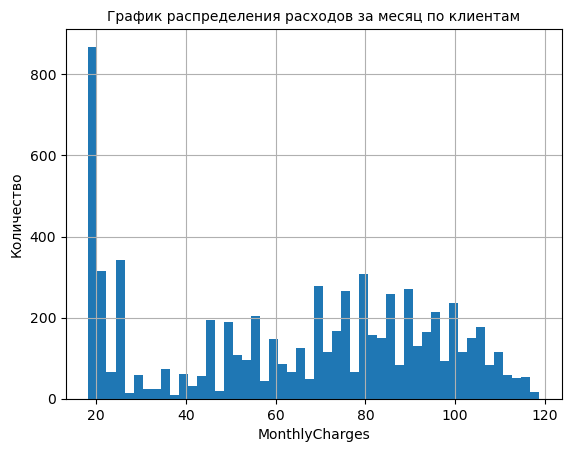

In [19]:
contract_df['MonthlyCharges'].hist(bins=50)
plt.xlabel('MonthlyCharges')
plt.ylabel('Количество')
plt.title('График распределения расходов за месяц по клиентам', fontsize=10);

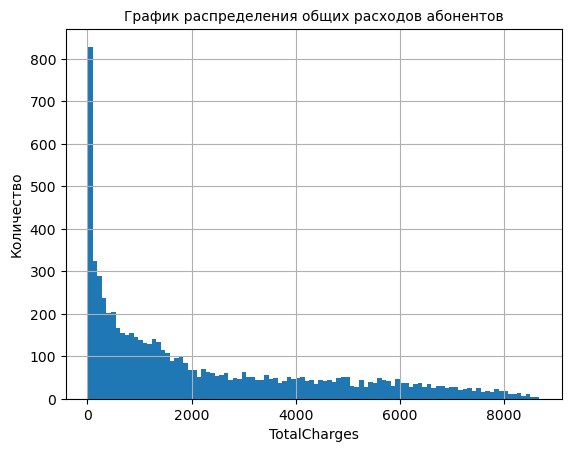

In [20]:
contract_df['TotalCharges'].hist(bins=100)
plt.xlabel('TotalCharges')
#plt.xticks(rotation=90)
plt.ylabel('Количество')
plt.title('График распределения общих расходов абонентов', fontsize=10);

***Вывод:***
Пропуски есть в графе EndDate, их можно надо будет заполнить числа: 0 - для тех, где указана дата окончания, и 1 - для действующих еще контрактов. Сделаем это после объединения всех таблиц, так как на основе графы  EndDate можно сгенерировать новые признаки.
Так как в проекте мы решаем задачу бинарной классификации и графа EndDate -наш целевой признак.


Аномалий в данных по графе MonthlyCharges и TotalCharges нет.

In [21]:
#посмотрим на уникальные значения в графе EndDate

contract_df['EndDate'].unique()

array([None, datetime.date(2019, 12, 1), datetime.date(2019, 11, 1),
       datetime.date(2019, 10, 1), datetime.date(2020, 1, 1)],
      dtype=object)

Рассмотрим сбалансирована ли даннные в целевом признаке - колонке EndDate.

In [22]:
#посмотрим самый ранний заключенный контракт

contract_df['BeginDate'].min()

Timestamp('2018-04-17 00:00:00')

Целевой признак не сбалансирован, надо будет это учесть при построение моделей.

***Персональные данные клиентов***

In [23]:
query2 = '''
SELECT *
FROM telecom.personal;
'''

personal_df = pd.read_sql_query(query2, con=engine) 

In [24]:
personal_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [25]:
personal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Посмотрим уникальные значения в колнках таблицы и их количество.

In [26]:
personal_df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [27]:
personal_df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [28]:
#этот столбец категориальный, изменим его тип

personal_df.loc[personal_df['SeniorCitizen'] == 0, 'SeniorCitizen'] = 'No'
personal_df.loc[personal_df['SeniorCitizen'] == 1, 'SeniorCitizen'] = 'Yes'

In [29]:
personal_df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [30]:
personal_df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [31]:
personal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   object
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: object(5)
memory usage: 275.2+ KB


***Информация об интернет-услугах***

In [32]:
query3 = '''
SELECT *
FROM telecom.internet;
'''

internet_df = pd.read_sql_query(query3, con=engine)

In [33]:
internet_df.head()

,c1,c2,c3,c4,c5,c6,c7,c8
0,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1,7590-VHVEG,DSL,No,Yes,No,No,No,No
2,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
4,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No


Смещены названия столбцов, надо это исправить.

In [34]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5518 entries, 0 to 5517
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   c1      5518 non-null   object
 1   c2      5518 non-null   object
 2   c3      5518 non-null   object
 3   c4      5518 non-null   object
 4   c5      5518 non-null   object
 5   c6      5518 non-null   object
 6   c7      5518 non-null   object
 7   c8      5518 non-null   object
dtypes: object(8)
memory usage: 345.0+ KB


In [35]:
#удалим первую строку
internet_df = internet_df.loc[1:]
internet_df.head()

,c1,c2,c3,c4,c5,c6,c7,c8
1,7590-VHVEG,DSL,No,Yes,No,No,No,No
2,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
4,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
5,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [36]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 1 to 5517
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   c1      5517 non-null   object
 1   c2      5517 non-null   object
 2   c3      5517 non-null   object
 3   c4      5517 non-null   object
 4   c5      5517 non-null   object
 5   c6      5517 non-null   object
 6   c7      5517 non-null   object
 7   c8      5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [37]:
#переименуем название колонок в таблице

internet_df.columns = ['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [38]:
internet_df.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1,7590-VHVEG,DSL,No,Yes,No,No,No,No
2,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
4,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
5,9237-HQITU,Fiber optic,No,No,No,No,No,No


В таблице с информацией об интернет-услугах:

1) отсутствие часть данных - обычно в таблице 7 043 строк. Видимл это потому, что не все пользователи полузуются услугами интернета.

2) переименовали названия столцов, где были указаны виды услуг, чтобы было понятно какую услугу анализируем.

***Информация об услугах телефонии***

In [39]:
query4 = '''
SELECT *
FROM telecom.phone;
'''

phone_df = pd.read_sql_query(query4, con=engine) 

In [40]:
phone_df.head()

,c1,c2
0,customerID,MultipleLines
1,5575-GNVDE,No
2,3668-QPYBK,No
3,9237-HQITU,No
4,9305-CDSKC,Yes


Тут также смещение строк. Обработаем это.

In [41]:
#удалим первую сторку
phone_df = phone_df.loc[1:]

In [42]:
#переименуем название колонок в таблице

phone_df.columns = ['customerID', 'MultipleLines']

In [43]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 1 to 6361
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


В таблице с информацией об услугах телефонии:


1) также отсутствие часть данных - обычно в таблице 7 043 строк. Видимо причина таже -   не все пользователи полузуются услугами и телефонии одновремнно.
2) переименовали названия столбцоы с видами услуг.

***Вывод:***

Мы загрузили данные. Получилось 4 таблицы, что соответствует условиям проекта. Все они содержат данные.

Пропуски есть в только в таблице contract_df по столбцам 'EndDate' и 'TotalCharges'. C ними будем работать после объединения всех таблиц. 

Какие изменения были сделаны:

 - поменяли тип данных в contract_df['BeginDate'] на datetime.
 - personal_df['SeniorCitizen']  на object вместо int, перед этим изменим 0 на No и 1 yf Yes.
 - в таблицах internet_df  и phone_df удалили нулквые строки, к торых было название таблиц и переимовали колонки в текстовое название услуг.
 
Аномалий и выбросов в данных нет.

***Объединение таблиц по ID клиента***

In [44]:
#объединение таблиц

data = contract_df.merge(personal_df, on ='customerID', how='left')
data = data.merge(internet_df, on ='customerID', how='outer')
data = data.merge(phone_df, on ='customerID', how = 'outer')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   object        
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517 non-null   object        
 14  OnlineBackup      5517 n

Сначала сгенерим новые признаки,  а потом обоработаем  пропуски.

In [45]:
#выделяем целевую переменную
#1 - для действующих контрактов, 0 - для разорванных.

def end_date(row):
    
    if row['EndDate'] is None:
        return '0'
    return '1'

data['target'] = data.apply(end_date, axis=1)

In [46]:
#введм вспомогательную колонку support для расчета новых признаков, потом ее удалим

def end_date(row):
    
    if row['EndDate'] is None:
        return 'не ушел'
    return 'ушел'

data['support'] = data.apply(end_date, axis=1)

In [47]:
#новый признак 1 количество дней использованияконтракта
#есть новые абоненты , кто заключил контракт 2020-20-01 по ним ограничивает дату использования 2020-02-01, потому что не известно что
#каковы их планы будут далее

data['EndDate'] = pd.to_datetime(data['EndDate'])
data['EndDate'] = data['EndDate'].fillna(pd.to_datetime('01-02-2020', format='%d-%m-%Y'))
data['contract_duration'] = (data['EndDate'] - data['BeginDate']).dt.days

data.head()


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,target,support,contract_duration
0,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,No,...,Yes,No,Yes,Yes,Yes,No,NaN,0,не ушел,0
1,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,Male,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,0,не ушел,0
2,3668-QPYBK,2018-08-09,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,No,...,Yes,Yes,No,No,No,No,No,1,ушел,479
3,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,Female,No,...,Yes,Yes,Yes,No,Yes,Yes,No,0,не ушел,0
4,9237-HQITU,2019-01-26,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,No,...,No,No,No,No,No,No,No,1,ушел,279


In [48]:
#новые признак  2 - количество дней до следубщей оплаты по контракту

def days_before_next_payment(row):
    if row['Type'] == 'Month-to-month':
        return row['contract_duration'] % 30
    elif row['Type'] == 'One year':
        return row['contract_duration'] % 366
    return row['contract_duration'] % 732

data['dbp'] = data.apply(days_before_next_payment, axis=1)
     
data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,target,support,contract_duration,dbp
0,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,No,...,No,Yes,Yes,Yes,No,NaN,0,не ушел,0,0
1,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,Male,No,...,NaN,NaN,NaN,NaN,NaN,No,0,не ушел,0,0
2,3668-QPYBK,2018-08-09,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,No,...,Yes,No,No,No,No,No,1,ушел,479,29
3,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,Female,No,...,Yes,Yes,No,Yes,Yes,No,0,не ушел,0,0
4,9237-HQITU,2019-01-26,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,No,...,No,No,No,No,No,No,1,ушел,279,9


In [49]:
#поменяме тип данных в target на int

data['target'] = data['target'].astype('int')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customerID         7043 non-null   object        
 1   BeginDate          7043 non-null   datetime64[ns]
 2   EndDate            7043 non-null   datetime64[ns]
 3   Type               7043 non-null   object        
 4   PaperlessBilling   7043 non-null   object        
 5   PaymentMethod      7043 non-null   object        
 6   MonthlyCharges     7043 non-null   float64       
 7   TotalCharges       7032 non-null   float64       
 8   gender             7043 non-null   object        
 9   SeniorCitizen      7043 non-null   object        
 10  Partner            7043 non-null   object        
 11  Dependents         7043 non-null   object        
 12  InternetService    5517 non-null   object        
 13  OnlineSecurity     5517 non-null   object        
 14  OnlineBa

***Заполнение пропусков***

In [51]:
#заполним пропуски в графе MultipleLines
data['MultipleLines'] = data['MultipleLines'].fillna('not_use_internet')


In [52]:
#удалим 11 пропусков   в MonthlyCharges по новым абонентам, наличие этих данных может коррелировать с целевым принаком (это позже проверим)
data = data.dropna(subset=['TotalCharges'])

In [53]:
#заполнение оставшихся признаков
data = data.fillna('not_use_phone')

Тепловая карта корреляции


<AxesSubplot:>

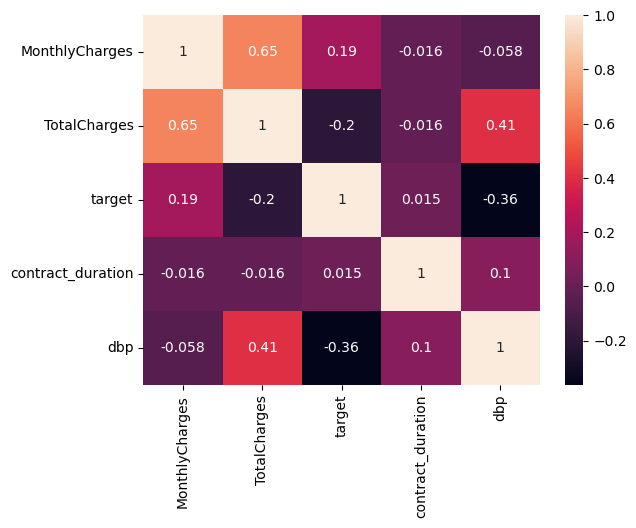

In [54]:
#тепловая карта корреляции количественных признаков
print ('Тепловая карта корреляции')
upp_mat = np.triu(data.corr())
sns.heatmap(data.corr(), annot = True)


***phik - корреляция***

In [55]:
#удалим неинформативные столбцы для phik матрицы-корреляции
data2 = data.drop('customerID', axis=1)
phik_corr = data2.phik_matrix(interval_cols=['MonthlyCharges', 'TotalCharges', 'contract_duration', 'dbp'])



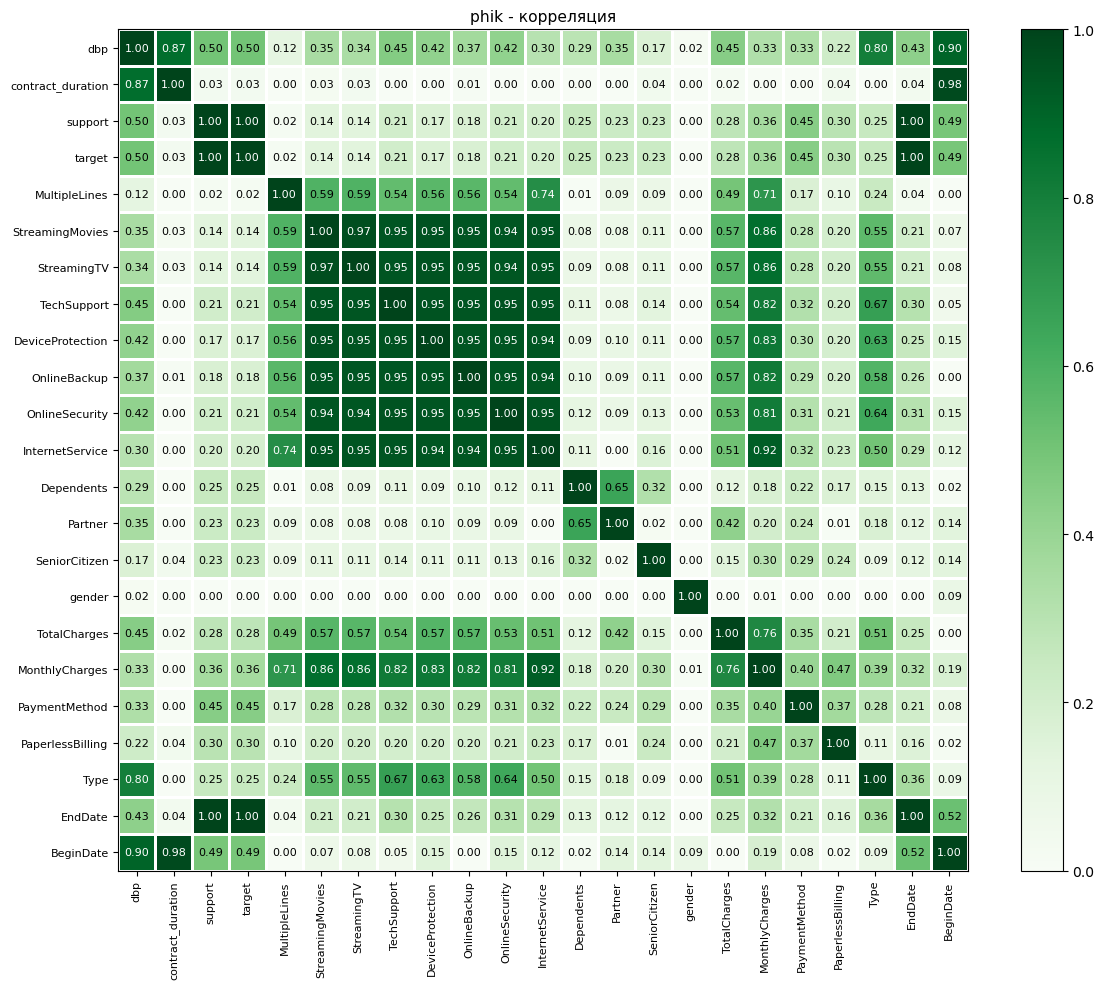

In [56]:
#построим график

from phik.report import plot_correlation_matrix

plot_correlation_matrix(phik_corr.values, 
                        x_labels=phik_corr.columns, 
                        y_labels=phik_corr.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"phik - корреляция", 
                        fontsize_factor=0.8, 
                        figsize=(12, 10))
plt.tight_layout()
plt.show()

***Вывод:***

Видим на матрице почти прямую зависимость между BeginDate c dbp и contact_duration. Столбец BeginDate, также как и EndDate и Support, перед разбивкой на выборки удалим.

В остальном сильных прямых зависимостей нет.


***Распределение целевой переменной***

In [57]:
data['target'].value_counts()

0    5163
1    1869
Name: target, dtype: int64

Целевея переменная не сбалансирована, надо будет учесть это в параментрах модели.

***Удаление признаков, на основе которых созданы производные признаки***

Удалим  признаки BeginDate  и EndDate, чтобы не было утечки данных. 
Вместо них используем производный от них признак contract_duration.

In [58]:
data.drop(['BeginDate', 'EndDate'], axis= 1 , inplace= True )

***Визуализация распределения каждого признака***

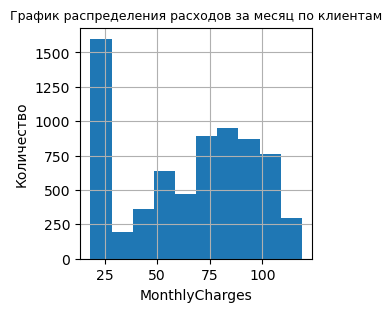

In [59]:
data['MonthlyCharges'].hist(figsize=(3,3))
plt.xlabel('MonthlyCharges')
plt.ylabel('Количество')
plt.title('График распределения расходов за месяц по клиентам', fontsize=9);

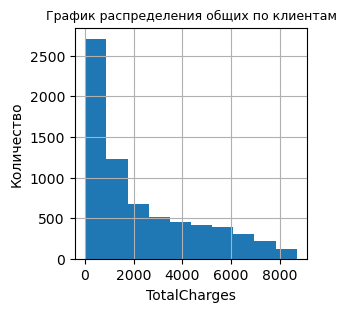

In [60]:
data['TotalCharges'].hist(figsize=(3,3))
plt.xlabel('TotalCharges')
plt.ylabel('Количество')
plt.title('График распределения общих по клиентам', fontsize=9);

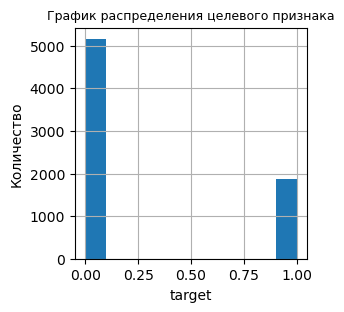

In [61]:
data['target'].hist(figsize=(3,3))
plt.xlabel('target')
plt.ylabel('Количество')
plt.title('График распределения целевого признака', fontsize=9);

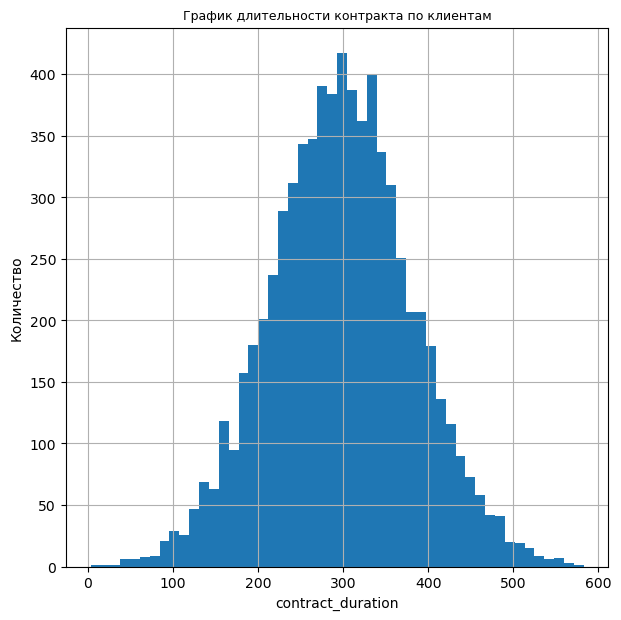

In [62]:
data['contract_duration'].hist(figsize=(7,7), bins=50)
plt.xlabel('contract_duration')
plt.ylabel('Количество')
plt.title('График длительности контракта по клиентам', fontsize=9);

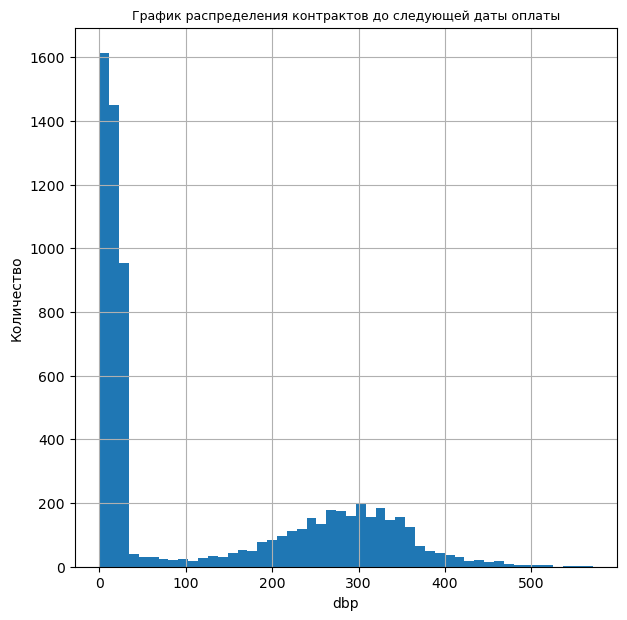

In [63]:
data['dbp'].hist(figsize=(7,7), bins=50)
plt.xlabel('dbp')
plt.ylabel('Количество')
plt.title('График распределения контрактов до следующей даты оплаты', fontsize=9);

Данные распределены нормально, логично, выбросов нет.

***Визуализация соотношение ушедших и оставшихся клиентов для каждого признака***

In [64]:
data['support'].unique()

array(['ушел', 'не ушел'], dtype=object)

In [65]:
data_type1 = data.pivot_table(index=['Type', 'support'], values = 'target', aggfunc='count')
df1= pd.DataFrame(data_type1.to_records())
df1.head(7)

,Type,support,target
0,Month-to-month,не ушел,2220
1,Month-to-month,ушел,1655
2,One year,не ушел,1306
3,One year,ушел,166
4,Two year,не ушел,1637
5,Two year,ушел,48


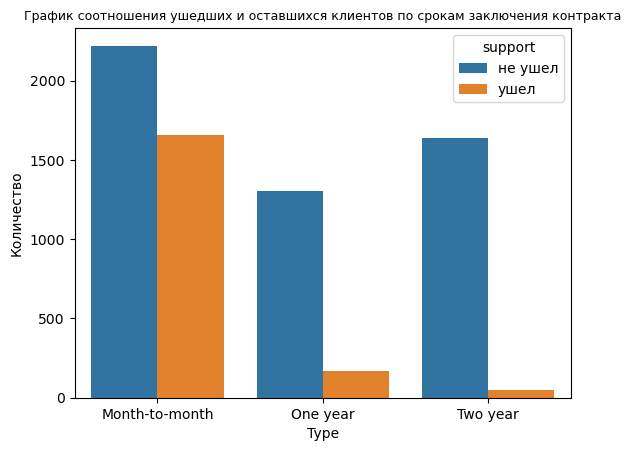

In [66]:
sns.barplot(data = df1, x ='Type', y = 'target', hue = 'support')
plt.xlabel('Type')
plt.ylabel('Количество')
plt.title('График соотношения ушедших и оставшихся клиентов по срокам заключения контракта', fontsize=9);
plt.show()

По графику контракты, заключенные с оплатой ежемесячно разрываются чаще. Но если понимать, что самый ранний контракт был заключен '2018-04-17 00:00:00', то возможно, среди них есть контракты заключенные на 2 года, но по нима еще не пришел срок опдаты за новый период и клиент его на разрывает (хотя и недоволен), потому что период оплачен. Поэтому эти признаким исключим их датафремы, так как они неполные.

In [67]:
data_type2 = data.pivot_table(index=['PaperlessBilling', 'support'], values = 'target', aggfunc='count')
df2= pd.DataFrame(data_type2.to_records())
df2.head(7)

,PaperlessBilling,support,target
0,No,не ушел,2395
1,No,ушел,469
2,Yes,не ушел,2768
3,Yes,ушел,1400


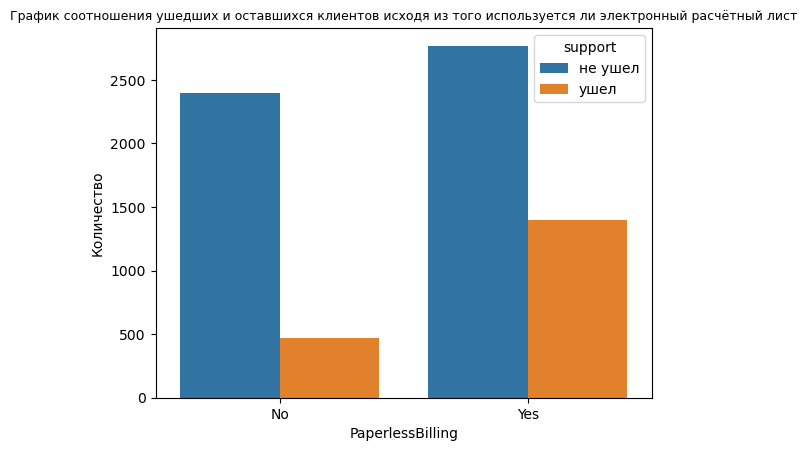

In [68]:
sns.barplot(data = df2, x ='PaperlessBilling', y = 'target', hue = 'support')
plt.xlabel('PaperlessBilling')
plt.ylabel('Количество')
plt.title('График соотношения ушедших и оставшихся клиентов исходя из того используется ли электронный расчётный лист', fontsize=9);
plt.show()

Зависимость есть, возможно, потому, что электронные счета 
не всегда заменты в рассылках на почте.

In [69]:
data_type3 = data.pivot_table(index=['PaymentMethod', 'support'], values = 'target', aggfunc='count')
df3= pd.DataFrame(data_type3.to_records())
df3.head(10)

,PaymentMethod,support,target
0,Bank transfer (automatic),не ушел,1284
1,Bank transfer (automatic),ушел,258
2,Credit card (automatic),не ушел,1289
3,Credit card (automatic),ушел,232
4,Electronic check,не ушел,1294
5,Electronic check,ушел,1071
6,Mailed check,не ушел,1296
7,Mailed check,ушел,308


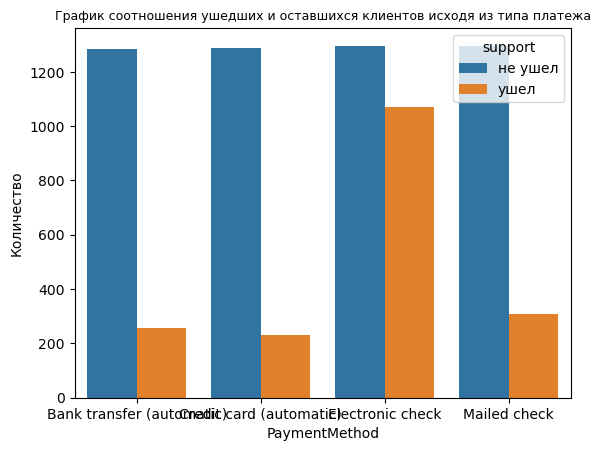

In [70]:
sns.barplot(data = df3, x ='PaymentMethod', y = 'target', hue = 'support')
plt.xlabel('PaymentMethod')
plt.ylabel('Количество')
plt.title('График соотношения ушедших и оставшихся клиентов исходя из типа платежа', fontsize=9);
plt.show()

Клиенты, которые пользуется электронным чеком, чаще разрывают контракты, чем те, кто выбираем иные типы пдатежа. 
Корреляция с таргетом есть, признак оставим.

In [71]:
data_type3 = data.pivot_table(index=['gender', 'support'], values = 'target', aggfunc='count')
df3= pd.DataFrame(data_type3.to_records())
df3.head(10)

,gender,support,target
0,Female,не ушел,2544
1,Female,ушел,939
2,Male,не ушел,2619
3,Male,ушел,930


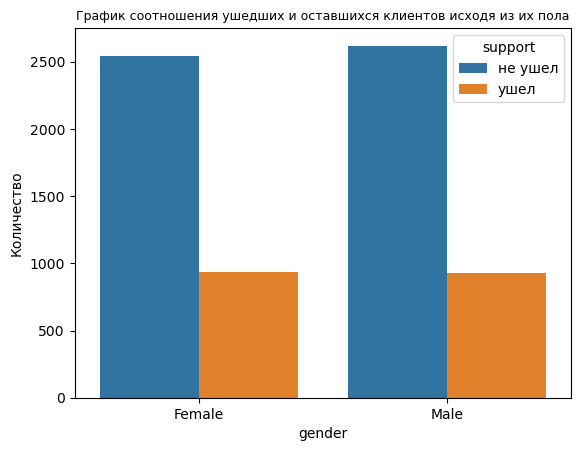

In [72]:
sns.barplot(data = df3, x ='gender', y = 'target', hue = 'support')
plt.xlabel('gender')
plt.ylabel('Количество')
plt.title('График соотношения ушедших и оставшихся клиентов исходя из их пола', fontsize=9);
plt.show()

Нет зависимости таргета от пола. Данные одинаковые. Признак удалим.

In [73]:
data_type3 = data.pivot_table(index=['SeniorCitizen', 'support'], values = 'target', aggfunc='count')
df3= pd.DataFrame(data_type3.to_records())
df3.head(10)

,SeniorCitizen,support,target
0,No,не ушел,4497
1,No,ушел,1393
2,Yes,не ушел,666
3,Yes,ушел,476


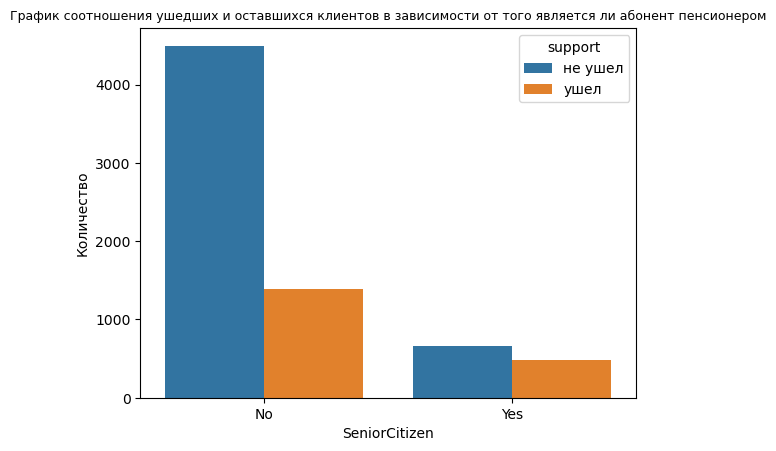

In [74]:
sns.barplot(data = df3, x ='SeniorCitizen', y = 'target', hue = 'support')
plt.xlabel('SeniorCitizen')
plt.ylabel('Количество')
plt.title('График соотношения ушедших и оставшихся клиентов в зависимости от того является ли абонент пенсионером', fontsize=9);
plt.show()

Пенсионеры меньше пользуются услугами компании и в процентов соотношении от заключивших контракт, чаще его разрывают. Признак оставим.

In [75]:
data_type3 = data.pivot_table(index=['Partner', 'support'], values = 'target', aggfunc='count')
df3= pd.DataFrame(data_type3.to_records())
df3.head(10)

,Partner,support,target
0,No,не ушел,2439
1,No,ушел,1200
2,Yes,не ушел,2724
3,Yes,ушел,669


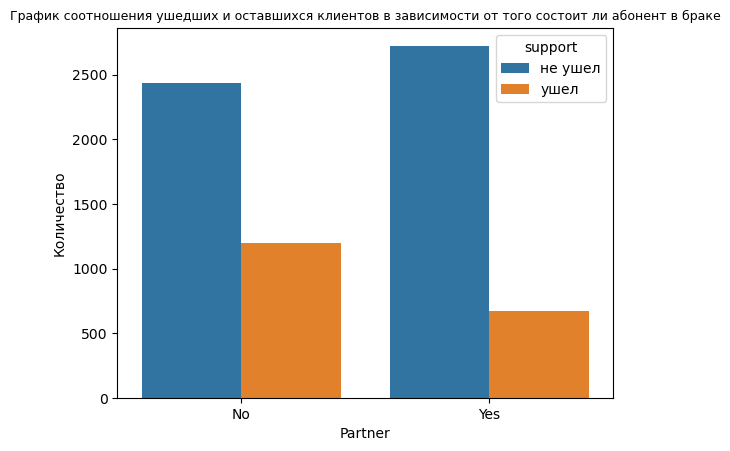

In [76]:
sns.barplot(data = df3, x ='Partner', y = 'target', hue = 'support')
plt.xlabel('Partner')
plt.ylabel('Количество')
plt.title('График соотношения ушедших и оставшихся клиентов в зависимости от того состоит ли абонент в браке', fontsize=9);
plt.show()

Холостые люди чаще разрывают контракты, зависимость от таргета есть. Признак оставим.

In [77]:
data_type3 = data.pivot_table(index=['Dependents', 'support'], values = 'target', aggfunc='count')
df3= pd.DataFrame(data_type3.to_records())
df3.head(10)

,Dependents,support,target
0,No,не ушел,3390
1,No,ушел,1543
2,Yes,не ушел,1773
3,Yes,ушел,326


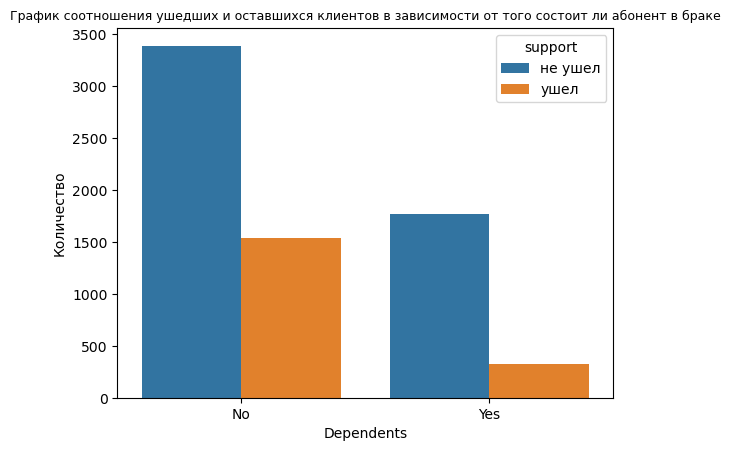

In [78]:
sns.barplot(data = df3, x ='Dependents', y = 'target', hue = 'support')
plt.xlabel('Dependents')
plt.ylabel('Количество')
plt.title('График соотношения ушедших и оставшихся клиентов в зависимости от того состоит ли абонент в браке', fontsize=9);
plt.show()

Те, у кого есть нет детей, чаще разрывают контракт. Признак оставим.

In [79]:
data_type3 = data.pivot_table(index=['InternetService', 'support'], values = 'target', aggfunc='count')
df3= pd.DataFrame(data_type3.to_records())
df3.head(10)

,InternetService,support,target
0,DSL,не ушел,1957
1,DSL,ушел,459
2,Fiber optic,не ушел,1799
3,Fiber optic,ушел,1297
4,not_use_phone,не ушел,1407
5,not_use_phone,ушел,113


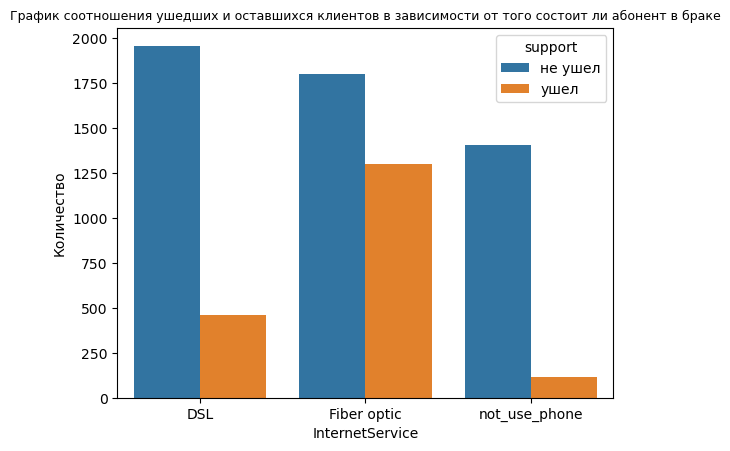

In [80]:
sns.barplot(data = df3, x ='InternetService', y = 'target', hue = 'support')
plt.xlabel('InternetService')
plt.ylabel('Количество')
plt.title('График соотношения ушедших и оставшихся клиентов в зависимости от того состоит ли абонент в браке', fontsize=9);
plt.show()

Те, кто использует тип подключения Fiber optic, чаще разрывают контракты. Зависимость есть, признак оставим.

In [81]:
data_type3 = data.pivot_table(index=['OnlineSecurity', 'support'], values = 'target', aggfunc='count')
df3= pd.DataFrame(data_type3.to_records())
df3.head(10)


,OnlineSecurity,support,target
0,No,не ушел,2036
1,No,ушел,1461
2,Yes,не ушел,1720
3,Yes,ушел,295
4,not_use_phone,не ушел,1407
5,not_use_phone,ушел,113


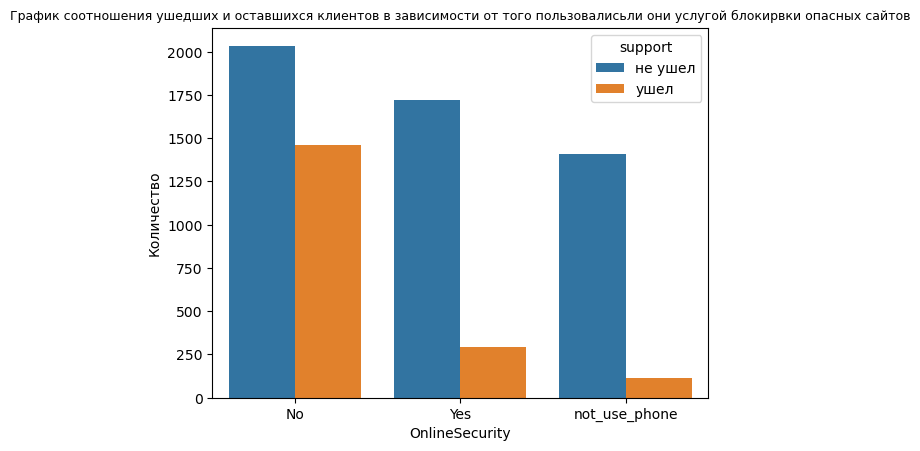

In [82]:

sns.barplot(data = df3, x ='OnlineSecurity', y = 'target', hue = 'support')
plt.xlabel('OnlineSecurity')
plt.ylabel('Количество')
plt.title('График соотношения ушедших и оставшихся клиентов в зависимости от того пользовалисьли они услугой блокирвки опасных сайтов', fontsize=9);
plt.show()

Абоненты, кто пользуется услугой блокировки опасных сайтов уходят меньше. Есть зависимость, признак оставим.

In [83]:
data_type3 = data.pivot_table(index=['OnlineBackup', 'support'], values = 'target', aggfunc='count')
df3= pd.DataFrame(data_type3.to_records())
df3.head(10)


,OnlineBackup,support,target
0,No,не ушел,1854
1,No,ушел,1233
2,Yes,не ушел,1902
3,Yes,ушел,523
4,not_use_phone,не ушел,1407
5,not_use_phone,ушел,113


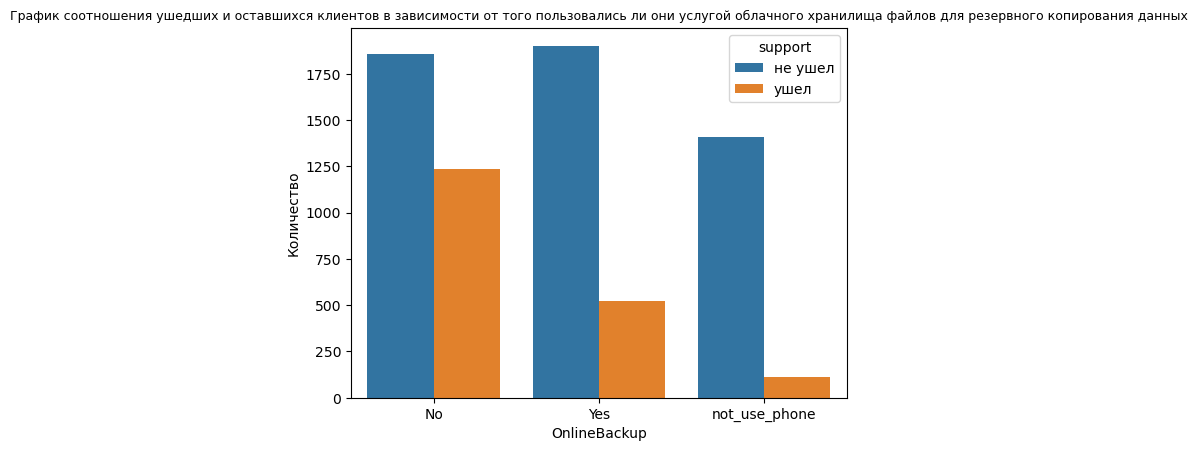

In [84]:

sns.barplot(data = df3, x ='OnlineBackup', y = 'target', hue = 'support')
plt.xlabel('OnlineBackup')
plt.ylabel('Количество')
plt.title('График соотношения ушедших и оставшихся клиентов в зависимости от того пользовались ли они услугой облачного хранилища файлов для резервного копирования данных', fontsize=9);
plt.show()

Абоненты, кто пользуется услугой облачного хранилища файлов для резервного копирования данных уходят реже. Есть зависимость, признак оставим.

In [85]:
data_type3 = data.pivot_table(index=['DeviceProtection', 'support'], values = 'target', aggfunc='count')
df3= pd.DataFrame(data_type3.to_records())
df3.head(10)


,DeviceProtection,support,target
0,No,не ушел,1883
1,No,ушел,1211
2,Yes,не ушел,1873
3,Yes,ушел,545
4,not_use_phone,не ушел,1407
5,not_use_phone,ушел,113


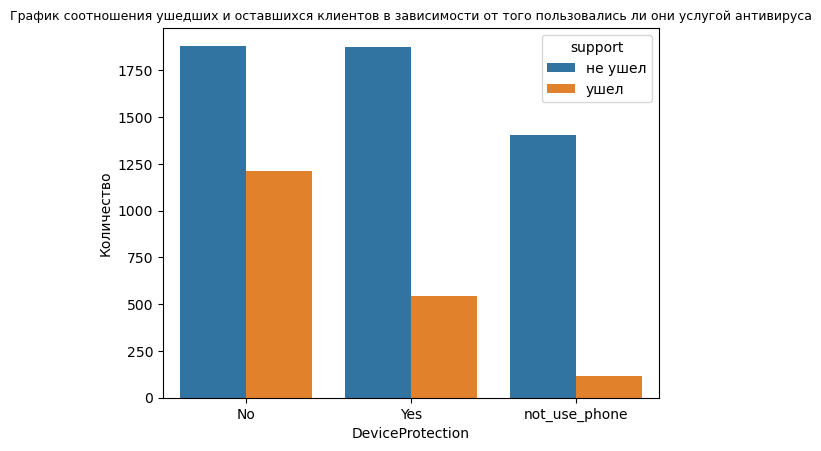

In [86]:

sns.barplot(data = df3, x ='DeviceProtection', y = 'target', hue = 'support')
plt.xlabel('DeviceProtection')
plt.ylabel('Количество')
plt.title('График соотношения ушедших и оставшихся клиентов в зависимости от того пользовались ли они услугой антивируса', fontsize=9);
plt.show()

Абоненты, кто пользуется услугой антивируса уходят реже. Есть зависимость, признак оставим.

In [87]:
data_type3 = data.pivot_table(index=['TechSupport', 'support'], values = 'target', aggfunc='count')
df3= pd.DataFrame(data_type3.to_records())
df3.head(10)

,TechSupport,support,target
0,No,не ушел,2026
1,No,ушел,1446
2,Yes,не ушел,1730
3,Yes,ушел,310
4,not_use_phone,не ушел,1407
5,not_use_phone,ушел,113


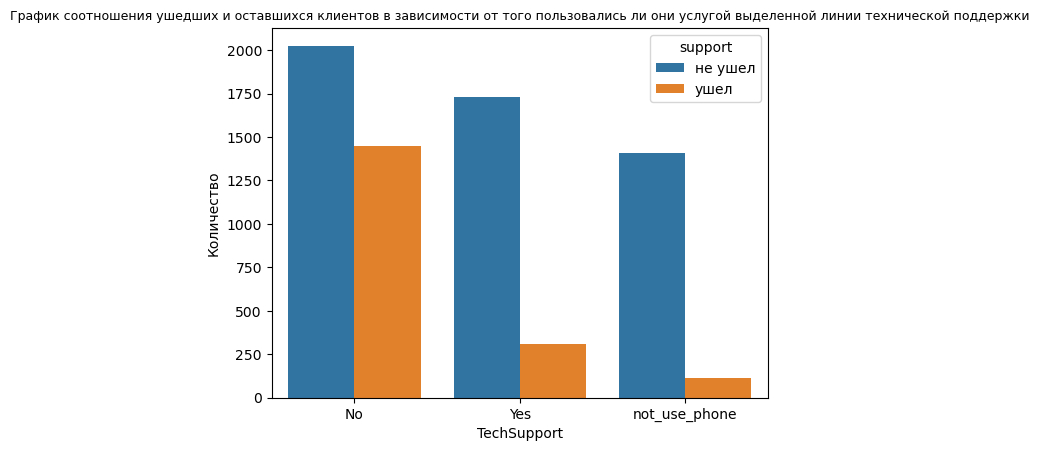

In [88]:
sns.barplot(data = df3, x ='TechSupport', y = 'target', hue = 'support')
plt.xlabel('TechSupport')
plt.ylabel('Количество')
plt.title('График соотношения ушедших и оставшихся клиентов в зависимости от того пользовались ли они услугой выделенной линии технической поддержки', fontsize=9);
plt.show()

Абоненты, кто пользуется услугой выделенной линии технической поддержки уходят реже. Есть зависимость, признак оставим.

In [89]:
data_type3 = data.pivot_table(index=['StreamingTV', 'support'], values = 'target', aggfunc='count')
df3= pd.DataFrame(data_type3.to_records())
df3.head(10)

,StreamingTV,support,target
0,No,не ушел,1867
1,No,ушел,942
2,Yes,не ушел,1889
3,Yes,ушел,814
4,not_use_phone,не ушел,1407
5,not_use_phone,ушел,113


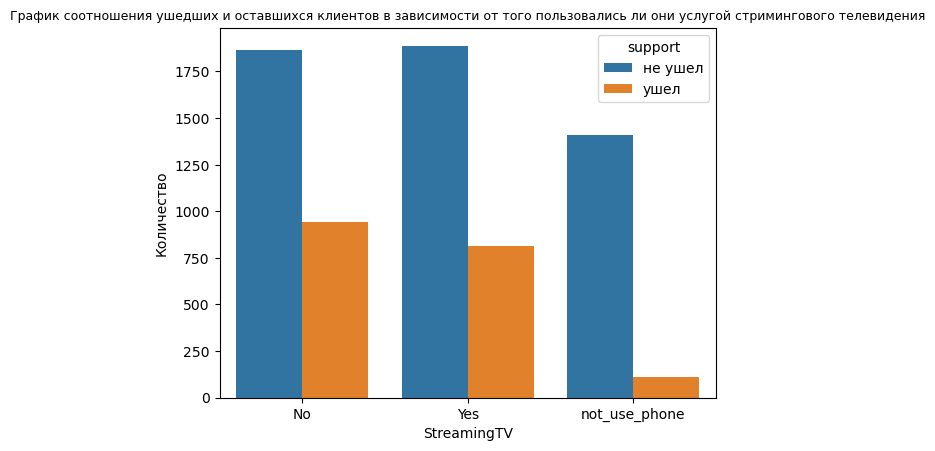

In [90]:
sns.barplot(data = df3, x ='StreamingTV', y = 'target', hue = 'support')
plt.xlabel('StreamingTV')
plt.ylabel('Количество')
plt.title('График соотношения ушедших и оставшихся клиентов в зависимости от того пользовались ли они услугой стримингового телевидения', fontsize=9);
plt.show()

Абоненты, кто пользуется услугой стримингового телевидения уходят реже, но отрыв с теми, кто не пользуется небольшой.
Небольшая зависимостьесть есть, признак оставим.

In [91]:
data_type3 = data.pivot_table(index=['StreamingMovies', 'support'], values = 'target', aggfunc='count')
df3= pd.DataFrame(data_type3.to_records())
df3.head(10)

,StreamingMovies,support,target
0,No,не ушел,1843
1,No,ушел,938
2,Yes,не ушел,1913
3,Yes,ушел,818
4,not_use_phone,не ушел,1407
5,not_use_phone,ушел,113


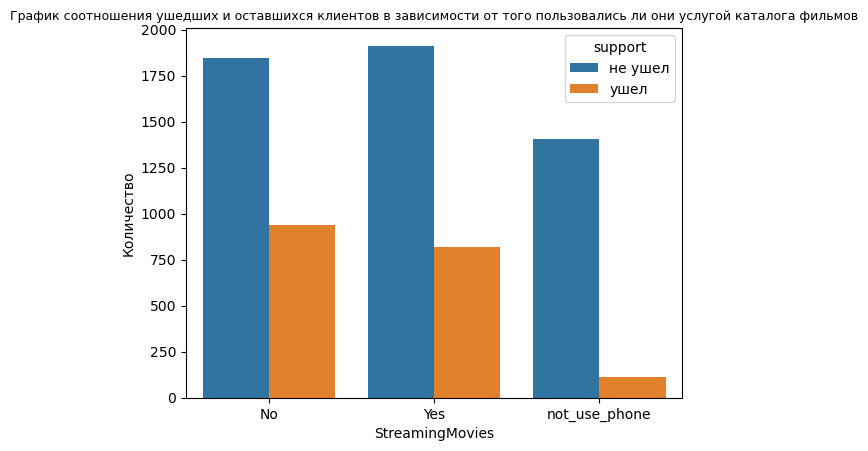

In [92]:
sns.barplot(data = df3, x ='StreamingMovies', y = 'target', hue = 'support')
plt.xlabel('StreamingMovies')
plt.ylabel('Количество')
plt.title('График соотношения ушедших и оставшихся клиентов в зависимости от того пользовались ли они услугой каталога фильмов', fontsize=9);
plt.show()

Ситуация, как и с предыдущим признаком. Но все же его оставим, так как небольшая зависимость есть.


In [93]:
data_type3 = data.pivot_table(index=['MultipleLines', 'support'], values = 'target', aggfunc='count')
df3= pd.DataFrame(data_type3.to_records())
df3.head(10)

,MultipleLines,support,target
0,No,не ушел,2536
1,No,ушел,849
2,Yes,не ушел,2117
3,Yes,ушел,850
4,not_use_internet,не ушел,510
5,not_use_internet,ушел,170


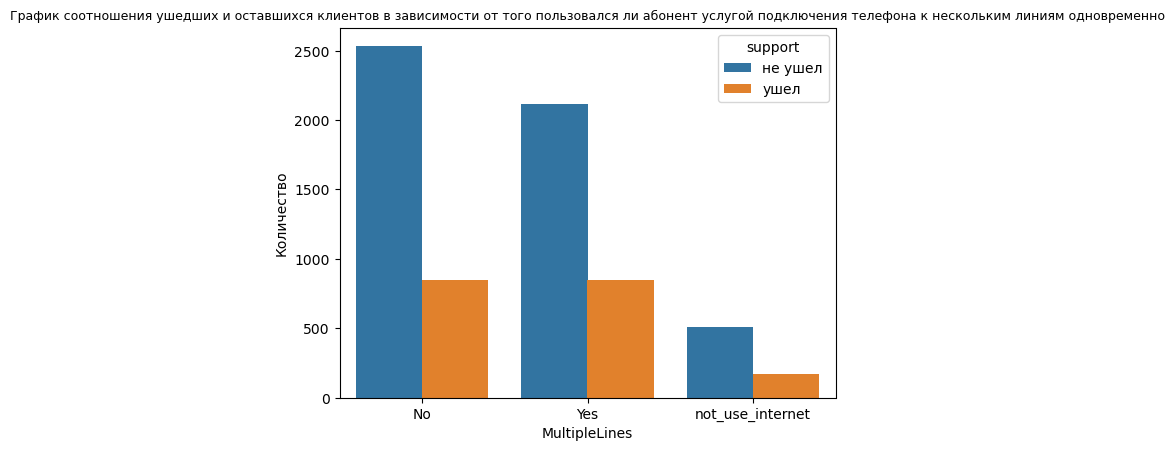

In [94]:
sns.barplot(data = df3, x ='MultipleLines', y = 'target', hue = 'support')
plt.xlabel('MultipleLines')
plt.ylabel('Количество')
plt.title('График соотношения ушедших и оставшихся клиентов в зависимости от того пользовался ли абонент услугой подключения телефона к нескольким линиям одновременно', fontsize=9);
plt.show()

По графику не видим зависимость пользовался ли абонент услугой подключения телефона к нескольким линиям одновременно от таргета. 
Поэтому признак удалим.

***Вывод:***

После визуализации соотношение ушедших и оставшихся клиентов для каждого признака можно сделать следубющиз выводы:


1. Нет зависмости от целевого признака у следующих признаков, которые мы удалим: MultipleLines, gender
2. Остальные признаким имеют зависимость разной силой и их мы будем использовать для будущих моделей.
4

***Удаление признаков, которые имеют слабую корреляцию с таргетом и ненужных признаков***

In [95]:
data_support = data.copy()

In [96]:
data.drop(['MultipleLines', 'gender', 'customerID', 'support'], axis= 1 , inplace= True )

***Разделение данных на выборки***

In [97]:
#выделим целевой признак
X = data.drop('target', axis=1)
y = data['target']

In [98]:
#разделите данные на тренировочную и тестовую выборки (test_size = 0.25)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                                            test_size = .25,
                                                                            random_state = RANDOM_STATE)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5274, 17) (5274,) (1758, 17) (1758,)


Далее необходимо подготовьте выборки для обучения, учитывая особенности выбранных моделей.
В проекте будем использовать следующие модели:

 - решающее дерево или случайный лес - используем модель RandomForestClassifier
 - бустинги - используем CatBoostClassifier и LightGBM
 - нейронные сети - используем полносвязную нейронную сеть
 

Для модели RandomForestClassifier надо закодирать количественные и качественные признаки.

Для модели CatBoostClassifier, проведем масштабирование количественных признаков, качественные кодирует сама модель.

In [99]:
#сделаем копии признаков, не для всех моделей нужно кодирование

X_train_ohe = X_train.copy()
X_test_ohe = X_test.copy()

***Кодирование качественных признаков техникой OHE***

In [100]:
#кодирование качеcтвенных переменных

cat_features = [
    'Type', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 'Partner',
    'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

ohe_encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='error')

train_temp = ohe_encoder.fit_transform(X_train_ohe[cat_features]) # обучили на трейне и сразу к нему применили
X_train_ohe[ohe_encoder.get_feature_names_out()] = train_temp # вписали новые признаки
X_train_ohe.drop(cat_features, axis=1, inplace=True) # удалили старые признаки



test_temp = ohe_encoder.transform(X_test_ohe[cat_features]) # обученный энкодер применили к тест. выборке
X_test_ohe[ohe_encoder.get_feature_names_out()] = test_temp # вписали новые признаки
X_test_ohe.drop(cat_features, axis=1, inplace=True) # удалили старые признаки

X_test_ohe.head()

,MonthlyCharges,TotalCharges,contract_duration,dbp,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,OnlineBackup_Yes,OnlineBackup_not_use_phone,DeviceProtection_Yes,DeviceProtection_not_use_phone,TechSupport_Yes,TechSupport_not_use_phone,StreamingTV_Yes,StreamingTV_not_use_phone,StreamingMovies_Yes,StreamingMovies_not_use_phone
5753,114.75,7842.30,398,398,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4036,49.65,2409.90,350,350,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4860,59.75,3624.35,284,284,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
938,93.80,3019.50,289,19,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5846,30.50,118.40,255,15,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


***Масштабирование признаков***

In [101]:
#масштабирование данных для моделей

#выделим количественные признаким

numeric=['MonthlyCharges', 'TotalCharges', 'contract_duration', 'dbp']
#создадим объект стандартизации и обучим его для моделей Л
scaler = StandardScaler()    
scaler.fit(X_train_ohe[numeric])

#сохраним преобразованные обучающую и тестовую  выборки в переменные
X_train_ohe[numeric] = scaler.transform(X_train_ohe[numeric])
X_test_ohe[numeric] = scaler.transform(X_test_ohe[numeric])

features_train_scaled = scaler.transform(X_train_ohe[numeric])
features_test_scaled = scaler.transform(X_test_ohe[numeric])


pd.options.mode.chained_assignment = None

In [102]:
X_train_ohe

,MonthlyCharges,TotalCharges,contract_duration,dbp,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,OnlineBackup_Yes,OnlineBackup_not_use_phone,DeviceProtection_Yes,DeviceProtection_not_use_phone,TechSupport_Yes,TechSupport_not_use_phone,StreamingTV_Yes,StreamingTV_not_use_phone,StreamingMovies_Yes,StreamingMovies_not_use_phone
1554,0.477609,-0.978790,1.511298,-0.868241,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4392,-1.460051,-0.713452,0.431465,1.464718,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
861,0.447748,0.056285,-0.684363,-0.889450,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
200,1.023406,0.320611,1.475304,-0.507693,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5022,1.310405,1.123390,-0.204437,-0.818754,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,-1.484935,-1.004779,-0.288424,-0.868241,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
5112,0.499176,1.200873,-2.064150,-0.005753,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
129,-0.652139,-0.071199,0.395470,-0.889450,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3091,-1.470005,-0.954756,-1.128295,0.545673,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [103]:
#сбросим индексы, чтобы в дальнейшем было проще сопостовлять данные в target и prediction

X_train_ohe = X_train_ohe.reset_index(drop=True)
X_test_ohe = X_test_ohe.reset_index(drop=True)

In [104]:
#сделаем копии признаков, не для всех моделей нужно кодирование

X_train_check = X_train_ohe.copy()
X_test_check = X_test_ohe.copy()

In [105]:
X_train_ohe

,MonthlyCharges,TotalCharges,contract_duration,dbp,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,OnlineBackup_Yes,OnlineBackup_not_use_phone,DeviceProtection_Yes,DeviceProtection_not_use_phone,TechSupport_Yes,TechSupport_not_use_phone,StreamingTV_Yes,StreamingTV_not_use_phone,StreamingMovies_Yes,StreamingMovies_not_use_phone
0,0.477609,-0.978790,1.511298,-0.868241,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.460051,-0.713452,0.431465,1.464718,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.447748,0.056285,-0.684363,-0.889450,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.023406,0.320611,1.475304,-0.507693,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.310405,1.123390,-0.204437,-0.818754,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,-1.484935,-1.004779,-0.288424,-0.868241,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
5270,0.499176,1.200873,-2.064150,-0.005753,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5271,-0.652139,-0.071199,0.395470,-0.889450,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5272,-1.470005,-0.954756,-1.128295,0.545673,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


***Масштабирование признаков для модели Catboost***

In [106]:
#сделаем копии признаков, не для всех моделей нужно кодирование

X_train_cat = X_train.copy()
X_test_cat = X_test.copy()

In [107]:
#масштабирование данных для моделей

#выделим количественные признаким

numeric=['MonthlyCharges', 'TotalCharges', 'contract_duration', 'dbp']
#создадим объект стандартизации и обучим его для моделей Л
scaler = StandardScaler()    
scaler.fit(X_train_cat[numeric])

#сохраним преобразованные обучающую и тестовую  выборки в переменные
X_train_cat[numeric] = scaler.transform(X_train_cat[numeric])
X_test_cat[numeric] = scaler.transform(X_test_cat[numeric])

features_train_scaled = scaler.transform(X_train_ohe[numeric])
features_test_scaled = scaler.transform(X_test_ohe[numeric])


pd.options.mode.chained_assignment = None

In [108]:
#сбросим индексы, чтобы в дальнейшем было проще сопостовлять данные в target и prediction

X_train_cat = X_train_cat.reset_index(drop=True)
X_test_cat = X_test_cat.reset_index(drop=True)

In [109]:
X_train_cat.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,contract_duration,dbp
0,Month-to-month,Yes,Bank transfer (automatic),0.477609,-0.978790,No,Yes,No,Fiber optic,No,No,No,No,Yes,No,1.511298,-0.868241
1,One year,No,Mailed check,-1.460051,-0.713452,No,No,No,not_use_phone,not_use_phone,not_use_phone,not_use_phone,not_use_phone,not_use_phone,not_use_phone,0.431465,1.464718
2,Month-to-month,Yes,Electronic check,0.447748,0.056285,No,No,No,Fiber optic,No,Yes,No,Yes,No,No,-0.684363,-0.889450
3,One year,Yes,Electronic check,1.023406,0.320611,No,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,1.475304,-0.507693
4,Month-to-month,Yes,Electronic check,1.310405,1.123390,Yes,No,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,-0.204437,-0.818754


# 3. Обучение моделей

В качестве метрики по условию задачи используем ROC-AUC.

ROC-AUC оценивает качество модели путем измерения площади под кривой ROC  – графика, который показывает зависимость между долей правильных предсказаний (True Positive Rate) и долей ошибочных предсказаний (False Positive Rate).

***Модель Случайный лес***

In [110]:
model = RandomForestClassifier(random_state=RANDOM_STATE, criterion='gini', class_weight = 'balanced')

In [111]:
%%time
params = {
    'criterion':['gini'],
    'n_estimators': range(150,251, 50),
    'max_depth': range (1,10, 2),
    'min_samples_leaf': range (1,10,4)
                     
}
ftwo_scorer = make_scorer(roc_auc_score)
grid = GridSearchCV(model,
                     params, cv = 5, scoring = 'roc_auc',
                     verbose=3, error_score='raise')
grid.fit(X_train_ohe, y_train)
#выводим результат
print(grid.best_params_)


Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=150;, score=0.802 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=150;, score=0.828 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=150;, score=0.815 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=150;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=150;, score=0.820 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=200;, score=0.802 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=200;, score=0.831 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=200;, score=0.816 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, 

In [112]:
#передадим лучшие параметры на вход модели
model_rf = grid.best_estimator_

In [113]:
#сохраним и выведем на печать лучшую метрику для модели

best_score_rf = grid.best_score_
print(best_score_rf)

0.8400173048305494


***XGBClassifier***

In [114]:
model_xgb = XGBClassifier(random_state=RANDOM_STATE,  eval_metric='error')

In [115]:
%%time
param_test1 = {
 'max_depth':range (6,50, 4),
 'learning_rate': [0.1, 0.01],
 'n_estimators': range(50,251, 50),
 'gamma': [0.1]
}

#ftwo_scorer = make_scorer(roc_auc_score)
grid = GridSearchCV(model_xgb, param_grid = param_test1, scoring='roc_auc', cv=5, verbose = 3, error_score='raise')
grid.fit(X_train_ohe, y_train)
#выводим результат
print(grid.best_params_)

Fitting 5 folds for each of 110 candidates, totalling 550 fits
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=50;, score=0.820 total time=   0.0s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=50;, score=0.845 total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=50;, score=0.831 total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=50;, score=0.830 total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=50;, score=0.828 total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.814 total time=   0.0s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.839 total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.824 total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.827 total t

In [116]:
#передадим лучшие параметры на вход модели
model_xgb = grid.best_estimator_

In [117]:
#сохраним и выведем на печать лучшую метрику для модели

best_score_xgb = grid.best_score_
print(best_score_xgb)

0.8324591719551044


***CatboostClassifier***

In [118]:
cat_features = [
    'Type', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 'Partner',
    'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]
model_cbc = CatBoostClassifier(random_state = RANDOM_STATE, cat_features = cat_features, loss_function='Logloss')

In [119]:
%%time
param_test3 = {
 'iterations': [1500],
 'max_depth':[3],
 'learning_rate': [0.01]
 #'n_estimators': range (150,251, 50)
}

grid = GridSearchCV(model_cbc, param_grid = param_test3, scoring='roc_auc', cv=5, verbose = 3, error_score='raise')
grid.fit(X_train_cat, y_train)
#выводим результат
print(grid.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
0:	learn: 0.6870868	total: 152ms	remaining: 3m 47s
1:	learn: 0.6817197	total: 161ms	remaining: 2m
2:	learn: 0.6760219	total: 173ms	remaining: 1m 26s
3:	learn: 0.6704221	total: 184ms	remaining: 1m 8s
4:	learn: 0.6652069	total: 194ms	remaining: 58s
5:	learn: 0.6607909	total: 206ms	remaining: 51.4s
6:	learn: 0.6554560	total: 217ms	remaining: 46.3s
7:	learn: 0.6505048	total: 228ms	remaining: 42.5s
8:	learn: 0.6459213	total: 240ms	remaining: 39.7s
9:	learn: 0.6409528	total: 251ms	remaining: 37.4s
10:	learn: 0.6367421	total: 263ms	remaining: 35.5s
11:	learn: 0.6321706	total: 275ms	remaining: 34.1s
12:	learn: 0.6276411	total: 286ms	remaining: 32.7s
13:	learn: 0.6233333	total: 296ms	remaining: 31.4s
14:	learn: 0.6191280	total: 308ms	remaining: 30.5s
15:	learn: 0.6150933	total: 318ms	remaining: 29.5s
16:	learn: 0.6116678	total: 329ms	remaining: 28.7s
17:	learn: 0.6078168	total: 339ms	remaining: 27.9s
18:	learn: 0.6039470	total: 350ms	re

In [120]:
#передадим лучшие параметры на вход модели
model_cbc = grid.best_estimator_

In [121]:
#сохраним и выведем на печать лучшую метрику для модели

best_score_cbc = grid.best_score_
print(best_score_cbc)

0.8420955990696299


***Полносвязная нейронная сеть***

In [122]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [123]:
class CustomEarlyStopping():
    """
    Ранняя остановка, чтобы остановить тренировку, когда потеря не улучшается после определенной эпохи.
    """
    def __init__(self, patience=5, min_delta=0):
        """
        :param patience: сколько эпох ждать, прежде чем остановиться, когда потеря не улучшается
        :param min_delta: минимальная разница между loss/метриками, если улучшений нет, то остановим обучение
        """
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            # reset counter if validation loss improves
            self.counter = 0
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            print(f"INFO: Early stopping counter {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                print('INFO: Early stopping')
                self.early_stop = True

In [124]:
# Переведём выборки в тензоры
X_train = torch.FloatTensor(np.array(X_train_ohe))
X_test = torch.FloatTensor(np.array(X_test_ohe))
y_train = torch.FloatTensor(np.array(y_train))
y_test = torch.FloatTensor(np.array(y_test))

In [125]:
class Net(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons):
            super(Net, self).__init__()
            
            self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
            self.bn1 = nn.BatchNorm1d(n_hidden_neurons_1)
            self.act1 = nn.ReLU()
            self.dp2 = nn.Dropout(p=0.2)
            self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
            self.act2 = nn.ReLU()
            self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)
            self.act3 = nn.Sigmoid()
            
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.dp2(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        
        return x

In [126]:
n_in_neurons = X_train.shape[1]
n_hidden_neurons_1 = 24
n_hidden_neurons_2 = 10
n_out_neurons = 1

net = Net(n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons)
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
loss = nn.BCEWithLogitsLoss()

In [127]:
dataset_train = torch.utils.data.TensorDataset(X_train, y_train)
dataset_test = torch.utils.data.TensorDataset(X_test, y_test)

train_dataloader = DataLoader(dataset_train, batch_size=40, shuffle=True,
                              num_workers=0)
test_dataloader = DataLoader(dataset_test, batch_size=40, num_workers=0)   

In [128]:
early_stopping = CustomEarlyStopping(patience=5, min_delta=20)

num_epochs = 100001
for epoch in range(num_epochs):
    net.train()
    for batch in train_dataloader:
        data_train, temperature_train = batch # просто выгружаем данные 
        optimizer.zero_grad()

        preds = net.forward(data_train).flatten()

        loss_value = loss(preds, temperature_train)
        loss_value.backward()
        optimizer.step()

    if epoch % 5 == 0:
        predicted_temp = [] 
        with torch.no_grad():
            net.eval()
            for batch in test_dataloader:
                data_test, temperature_test = batch # просто выгружаем данные

                test_preds = net.forward(data_test).flatten()
                predicted_temp.append(test_preds)
                BCE_loss = loss(test_preds, temperature_test)

        predicted_temp = torch.cat(predicted_temp).detach().numpy()
        ROC_AUC = roc_auc_score(y_test, predicted_temp)
        early_stopping(BCE_loss)
        if early_stopping.counter == 0:
            best_roc = ROC_AUC
            best_predicted_temp = predicted_temp
        print(f"epoch:{epoch}, ROC_AUC test: {ROC_AUC}")

        if early_stopping.early_stop:
            print('Early Stoppning!!!')
            print(f'Best ROC_AUC test {best_roc}')
            break 

epoch:0, ROC_AUC test: 0.8247562306034775
INFO: Early stopping counter 1 of 5
epoch:5, ROC_AUC test: 0.8257836533900718
INFO: Early stopping counter 2 of 5
epoch:10, ROC_AUC test: 0.8209895783924435
INFO: Early stopping counter 3 of 5
epoch:15, ROC_AUC test: 0.8110084158885472
INFO: Early stopping counter 4 of 5
epoch:20, ROC_AUC test: 0.8244724823483175
INFO: Early stopping counter 5 of 5
INFO: Early stopping
epoch:25, ROC_AUC test: 0.8227039260594398
Early Stoppning!!!
Best ROC_AUC test 0.8247562306034775


Метрика на тестовой выборке ниже требуемой по условиям задачи 0,85, в итоговую таблицу поэтому данные по нейросети не добавляю.

***Выбор лучшей модели по значению метрики***

In [129]:
# Создание DataFrame с результатами
results = pd.DataFrame({'Model': ['RandomForestClassifier', 'XGBClassifier', 'CatboostClassifier'],
                        'ROC-AUC': [best_score_rf, best_score_xgb, best_score_cbc]
                        })




# Вывод результатов
results

,Model,ROC-AUC
0,RandomForestClassifier,0.840017
1,XGBClassifier,0.832459
2,CatboostClassifier,0.842096


***Вывод***:

Лучшей по значению метрики ROC-AUC оказалсь модель ___CatboostClassifier___ ее метрика равна 0,842160 на кросс-валидации. Проверим качество модели на тестовой выборке.

# 4. Тестирование модели и демонстрация ее работы

1. Проверим качество лучшей модели на тестовой выборке. Значение метрики ROC-AUC должно быть не менее 0.85. Для интерпретируемости модели дополнительно выведем значение accuracy.

2. Построим матрицу ошибок лучшей модели. Отобразим полноту и точность модели на графике.

3. Проанализируем важность основных входных признаков, влияющих на отток клиентов.

4. Для одного из важных входных признаков проведем дополнительное исследование:
Покажим график зависимости входного и целевого признаков.

***Значения ROC-AUC и accuracy на тестовой выборке***

In [130]:
model_cbc = grid.best_estimator_

In [131]:
#Модель CatboostClassifier

predictions_test = grid.best_estimator_.predict(X_test_cat)


In [132]:
#метрика AUC-ROC показывает насколько наша модель отличается от случайно, 
#UC-ROC случайной модели равна 0.5.
#на тестовой выборке

probabilities_test = model_cbc.predict_proba(X_test_cat)
probabilities_one_test = probabilities_test[:, 1]
auc_roc_test = roc_auc_score(y_test, probabilities_one_test)
accuracy_xgb = accuracy_score(y_test, predictions_test)

print("ROC_AUC на тестовой выборке:", auc_roc_test)
print("Accuracy на тестовой выборке:", accuracy_xgb)

ROC_AUC на тестовой выборке: 0.8627793438046321
Accuracy на тестовой выборке: 0.8191126279863481


***Матрица ошибок***

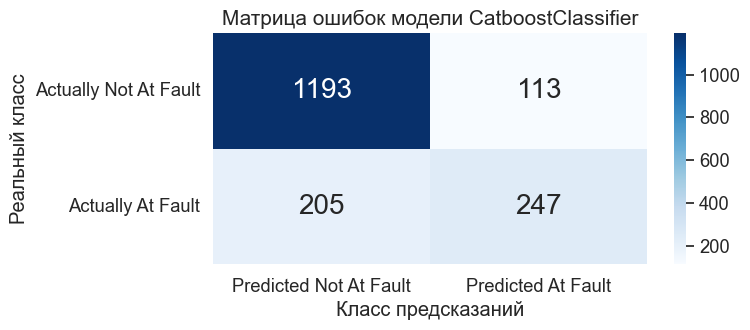

In [133]:
cm_xgb = confusion_matrix(y_test, predictions_test)
cm_xgb_col = pd.DataFrame(cm_xgb, index=['Actually Not At Fault', 'Actually At Fault'],
                 columns=['Predicted Not At Fault', 'Predicted At Fault'])

sns.set(font_scale=1.2)
plt.figure(figsize=(7,3))
    
sns.heatmap(cm_xgb, annot=True, fmt='g', cmap="Blues",xticklabels=cm_xgb_col.columns, yticklabels=cm_xgb_col.index, annot_kws={"size": 20})
plt.title("Матрица ошибок модели CatboostClassifier", size=15)
plt.xlabel('Класс предсказаний')
plt.ylabel('Реальный класс');

Модель чаще предсказывает, что клиент не уходит.

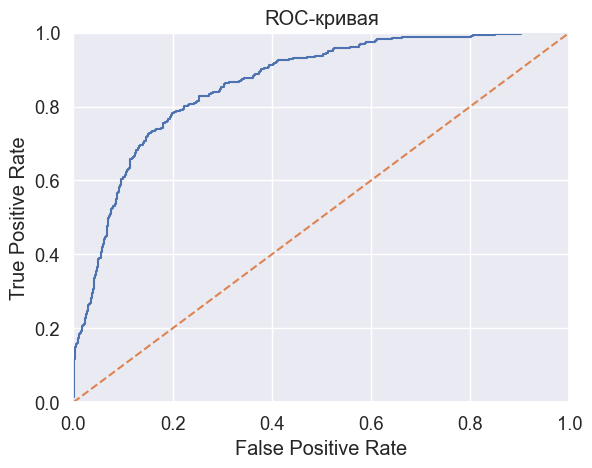

In [134]:
#построим ROC-кривую или кривую ошибок и справним ее со случайной моделью 
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test)  

plt.figure()

#постройте график
plt.plot(fpr, tpr)
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Чем больше кривая ROC охватывает верхний левый угол графика, тем лучше модель классифицирует данные по категориям. Наша модель судя по графику, делает это хорошо, также заметно, что площадь под кривой большая. Поэтому можно сказать, что модель работает хорошо.

***График полноты и точности***

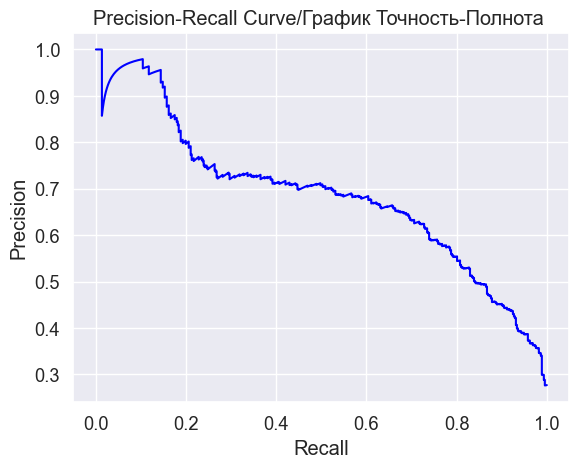

In [135]:
#график точноти и полноты 

precision, recall, thresholds = precision_recall_curve(y_test, probabilities_test[:, 1])

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='blue')

#add axis labels to plot
ax.set_title('Precision-Recall Curve/График Точность-Полнота ')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show() 

Чем выше график, тем лучше работает модель, у нас он пологий, модель хорошая, но нужна ее дорабока.


***Анализ основных факторов, влияющий на отток клиентов***

Также оценим основные факторы, влияющие на отток клиентов с помощью техники Sharp

In [136]:
explainer = shap.TreeExplainer(model_cbc)
shap_values = explainer.shap_values(X_test_cat, check_additivity=False)

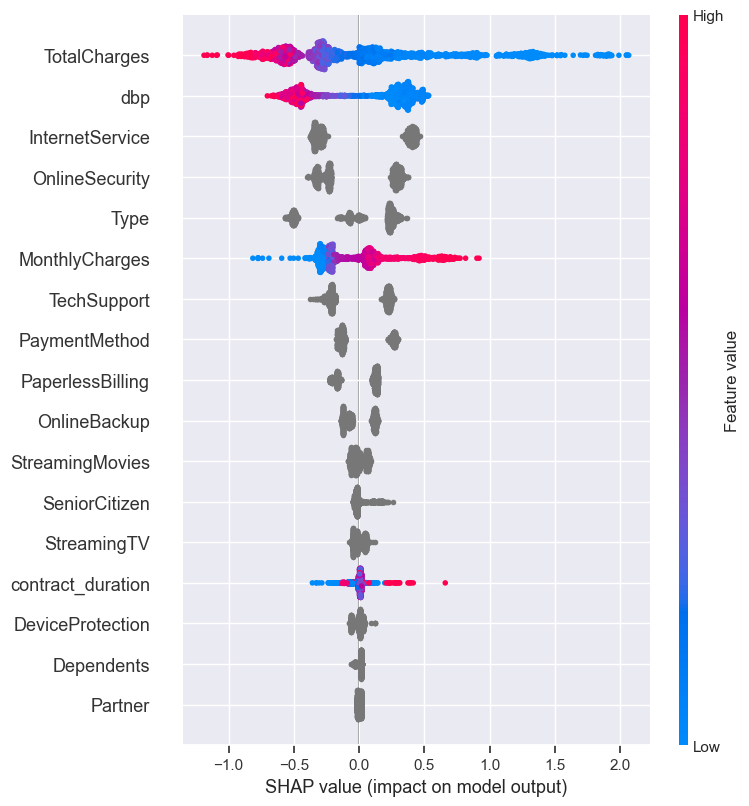

In [137]:
shap.summary_plot(shap_values, X_test_cat)

На диаграмме иним цветом отмечены клиенты с низким значением соответствующей переменной, а красным — с высоким;
По диаграмме, визуализирующей все SHAP‑значения для каждого признака, можно заметить, что большое влияние на риск оттока клиентов из имеющихся в модели признаков оказывает признак dbp- количество дней перед платежм по контракту:  когда приблиажется дата оплаты по контракут, растет риск разрыва контракта. 

Покажем на графике его зависимость от целевого признака.  По базе данных видим, что у нас есть несколько воможных сумм, поэтому для визуализации зависимости будем использовать столбчатую диагрумму.

***Для одного из важных входных признаков - TotalCharges -  на графике покажем его зависимость от целевого признака***

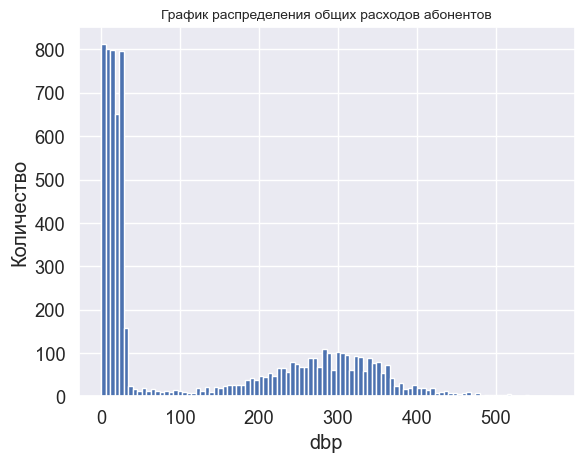

In [138]:
#посмотрим распределение сумма общих расходов абонентов
data_support['dbp'].hist(bins=100)
plt.xlabel('dbp')
#plt.xticks(rotation=90)
plt.ylabel('Количество')
plt.title('График распределения общих расходов абонентов', fontsize=10);

In [139]:
#посмотрим какие сроки контрактов существуют
data_support['Type'].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [140]:
#сумм расходов оказалось слишклм много, разделим их на категории

def charges_group(dbp):
    
    if dbp <= 30:
        return '<30'
    if dbp <= 365:
        return '<365'
    return '>365' 

In [141]:
data_support['Type_dbp'] = data_support['dbp'].apply(charges_group)

In [142]:
data_type3 = data_support.pivot_table(index=['Type_dbp', 'support'], values = 'target', aggfunc='count')
df3= pd.DataFrame(data_type3.to_records())
df3.head(10)


,Type_dbp,support,target
0,<30,не ушел,2333
1,<30,ушел,1668
2,<365,не ушел,2515
3,<365,ушел,189
4,>365,не ушел,315
5,>365,ушел,12


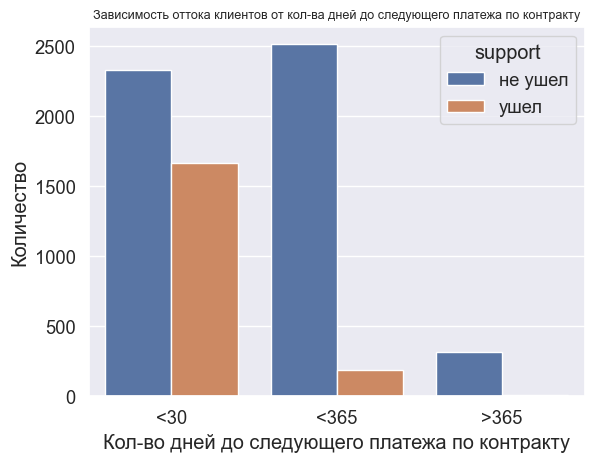

In [143]:
#построим график
sns.barplot(data = df3, x ='Type_dbp', y = 'target', hue = 'support')
plt.xlabel('Кол-во дней до следующего платежа по контракту')
plt.ylabel('Количество')
plt.title('Зависимость оттока клиентов от кол-ва дней до следующего платежа по контракту', fontsize=9);
plt.show()

По графику также видно, что чем меньше дней до оплаты по контракут остается, тем выше риск разрыва контракта.

# 5. Общий вывод по работе

Напишите общие выводы, предложите способы для дальнейшего улучшения модели и дайте бизнес-рекомендации заказчику.

При сравнении метрик моделей лучший результат дала модель CatBoostClassifier, ее метрика ROC-AUC на кросс-валидации = 0,842 на тестировании 0,863, при этом accuracy = 0.819, а это хорошие показатели.

Если обратиться к матрице ошибок, то можно увидеть, что наша модель чаще предсказывает, что клиент останется (1197), чем то, что уйдет (243). Такие ошибки критичны для бизнеса.

Необходимо дорабатывать модель: добавить больше данных по длительным контрактам, тем, где дата оплаты раз в 2 года, опросить уходящих клиентов в чем причина. Все это может дать более глубокое понимание, какие факторы влияют на клиентов при решении разорвать контракт с компанией.

Необходимо добавить данные, более длительный дедлайн по сбору. Собрать как можно больше информации, возможно, сгенерировать её и поставить на обработку искусственные наблюдения.

